Importing  packages  and Load the Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support,roc_auc_score,roc_curve,auc

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/datasets/default of credit card clients.xls",header=1,index_col=0)

In [4]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
data.rename(columns={'default payment next month':'default','PAY_0':'PAY_1'},inplace=True)

In [6]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [7]:
len(data)

30000

In [8]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [10]:
data['default'].value_counts(1)

0    0.7788
1    0.2212
Name: default, dtype: float64

In [11]:
data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [12]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [0]:
columns=list(data.columns)
num=[]
cat=[]
#Classifing numerical and categorical data into num[] and cat[] lists
for i in columns:
    if((np.array(data[i].unique()).shape[0]>30 and data[i].dtype in['int64'])):
      num.append(i)  #appending to num list
    else:
      cat.append(i)  #appending to cat list

In [14]:
num,cat

(['LIMIT_BAL',
  'AGE',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'],
 ['SEX',
  'EDUCATION',
  'MARRIAGE',
  'PAY_1',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'default'])

# Univariate analysis

## Histogram and Box plots for Numerical variables

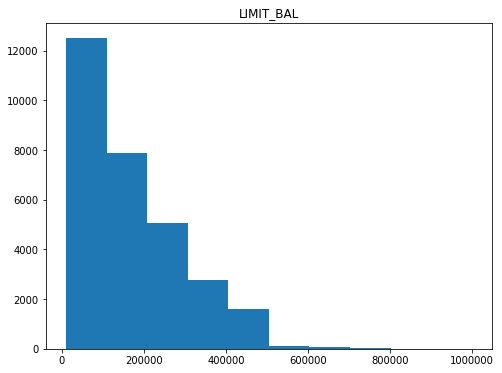

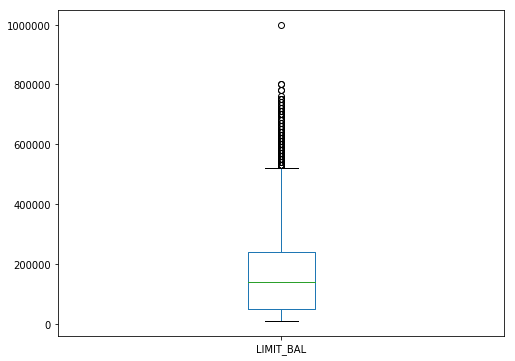

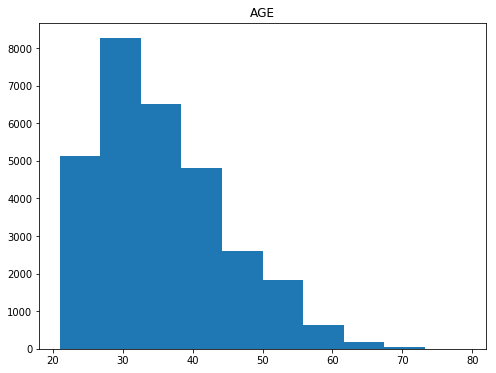

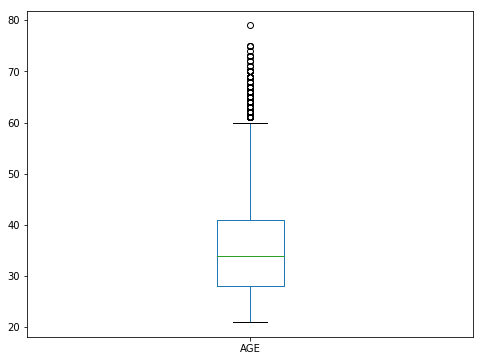

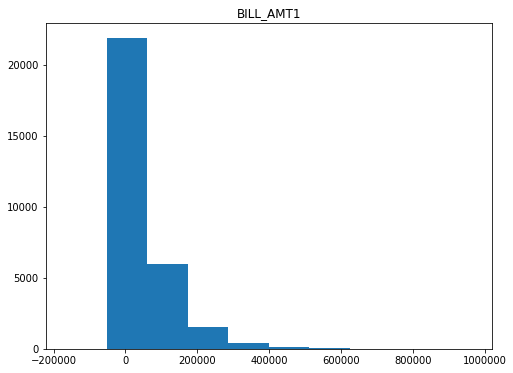

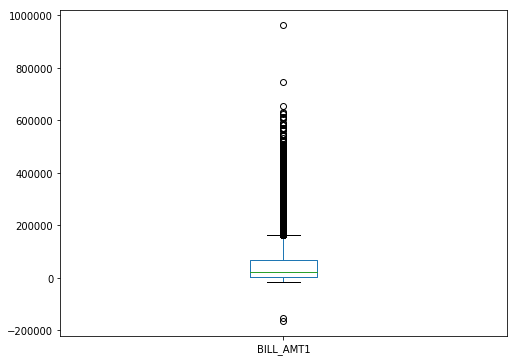

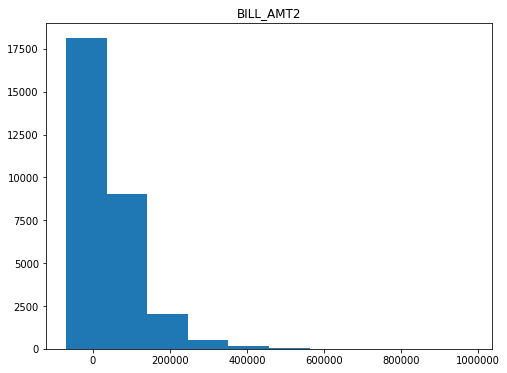

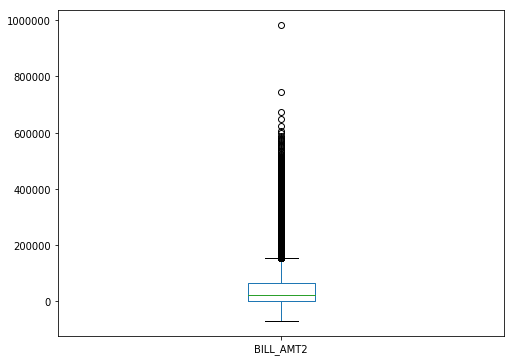

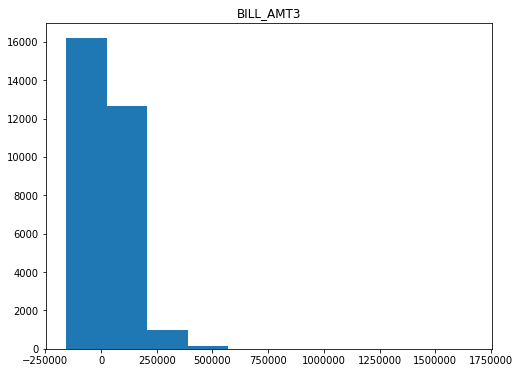

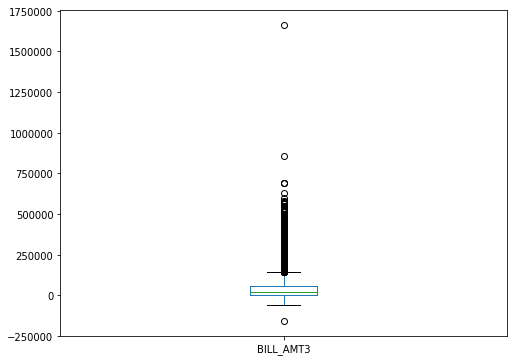

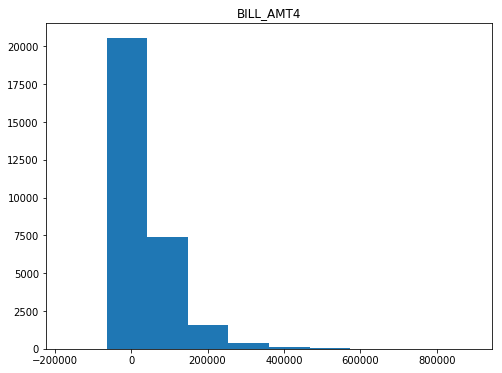

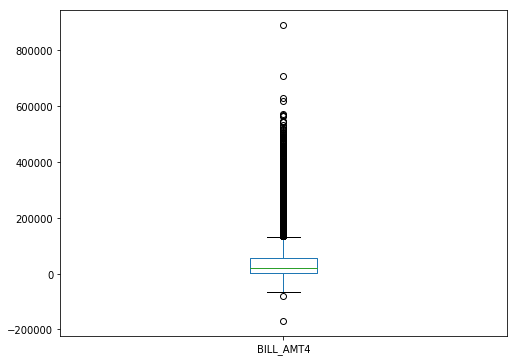

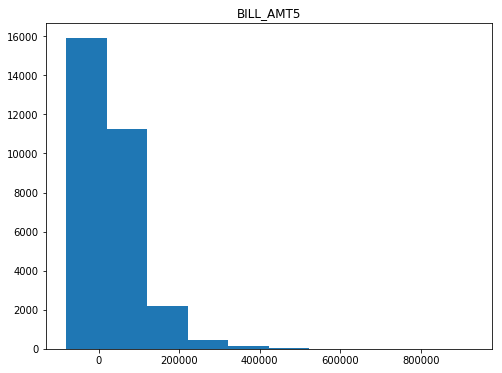

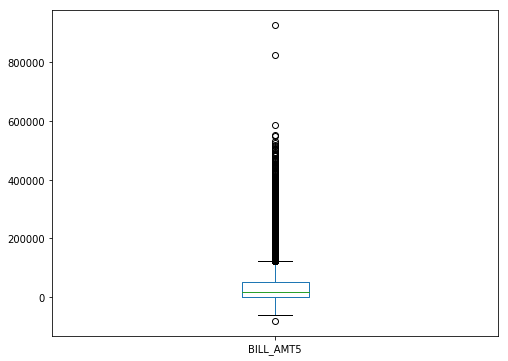

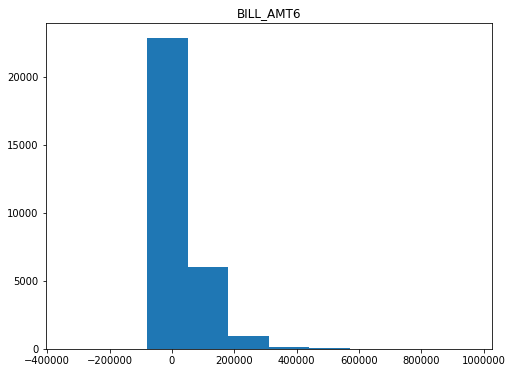

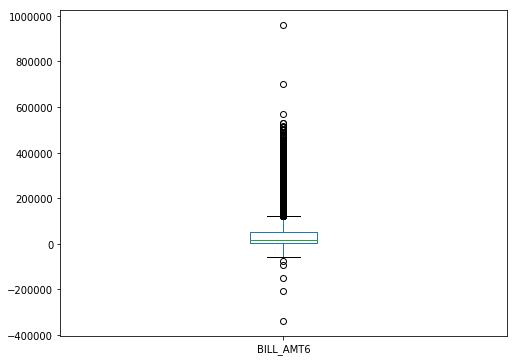

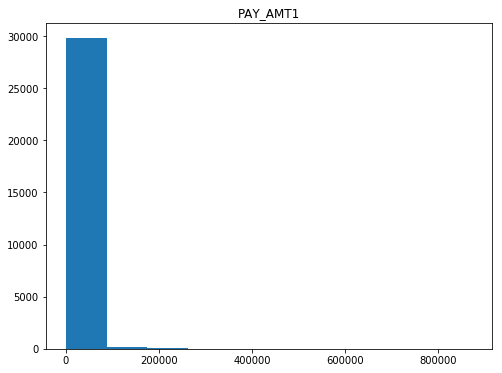

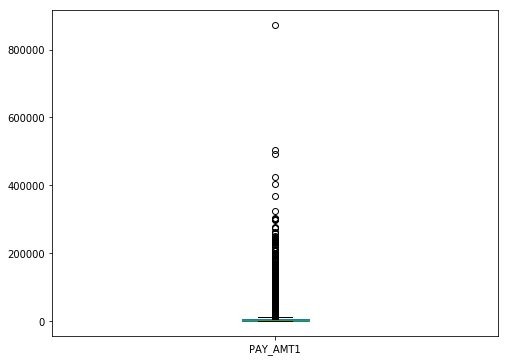

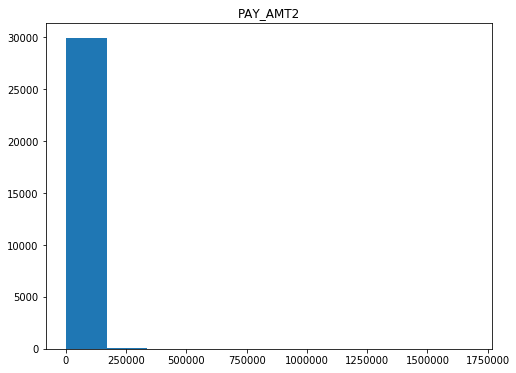

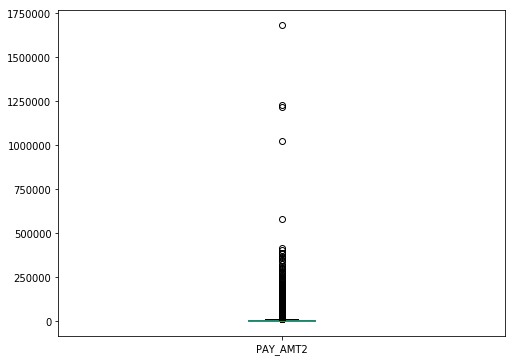

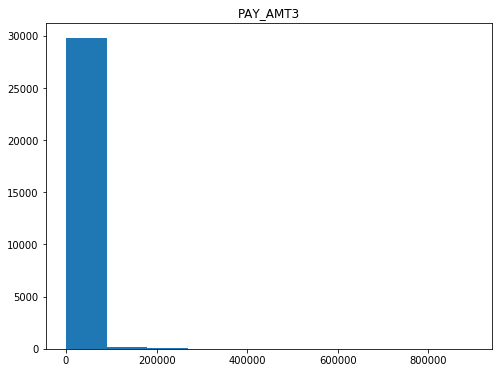

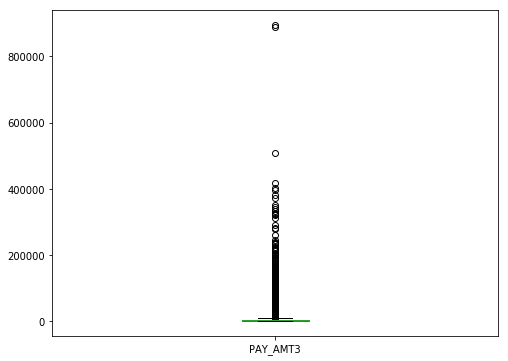

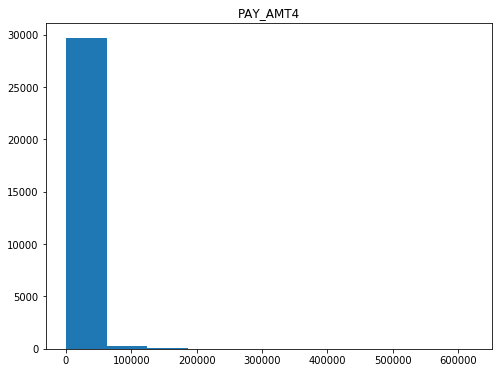

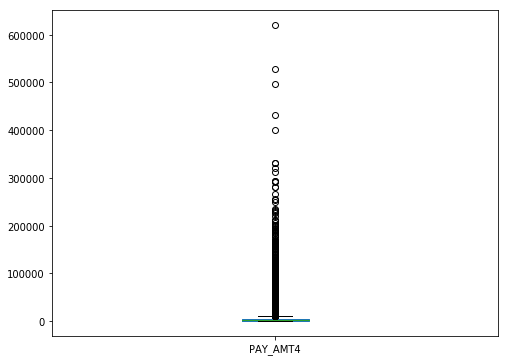

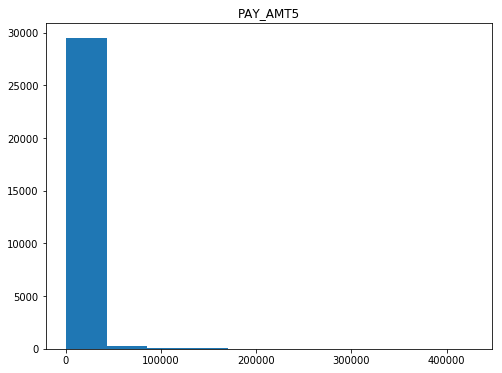

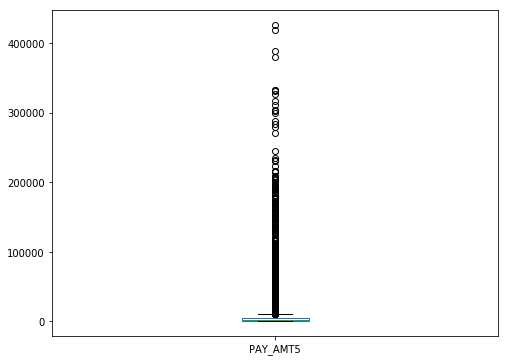

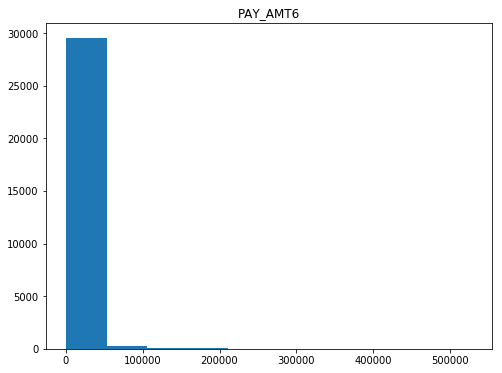

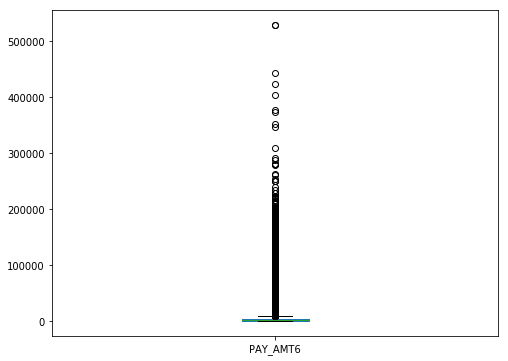

In [15]:
for j in num:
  data.hist(column=j,grid=False,figsize=(8,6))
  #plt.savefig('%s_hist.png'%j)
  plt.show() 
  data.boxplot(column=j,grid=False,figsize=(8,6))
  plt.show()

In [16]:
for j in num:
  q1 = np.percentile(data[j],25)
  q3 = np.percentile(data[j],75)
  iqr = q3-q1
  lb = q1-1.5*iqr
  ub = q3+1.5*iqr
  c = data[(data[j]<lb)|(data[j]>ub)].shape[0]
  print('No. of outliers in ',j ,'is',c,"and in % is",round(c/len(data)*100,4))

No. of outliers in  LIMIT_BAL is 167 and in % is 0.5567
No. of outliers in  AGE is 272 and in % is 0.9067
No. of outliers in  BILL_AMT1 is 2400 and in % is 8.0
No. of outliers in  BILL_AMT2 is 2395 and in % is 7.9833
No. of outliers in  BILL_AMT3 is 2469 and in % is 8.23
No. of outliers in  BILL_AMT4 is 2622 and in % is 8.74
No. of outliers in  BILL_AMT5 is 2725 and in % is 9.0833
No. of outliers in  BILL_AMT6 is 2693 and in % is 8.9767
No. of outliers in  PAY_AMT1 is 2745 and in % is 9.15
No. of outliers in  PAY_AMT2 is 2714 and in % is 9.0467
No. of outliers in  PAY_AMT3 is 2598 and in % is 8.66
No. of outliers in  PAY_AMT4 is 2994 and in % is 9.98
No. of outliers in  PAY_AMT5 is 2945 and in % is 9.8167
No. of outliers in  PAY_AMT6 is 2958 and in % is 9.86


## categorical plots

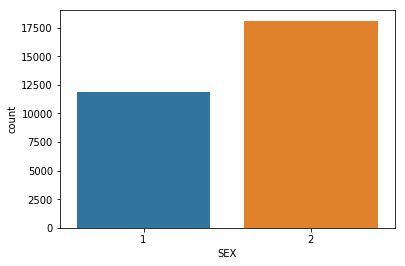

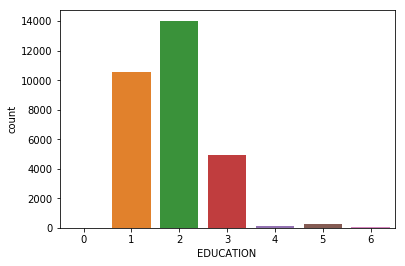

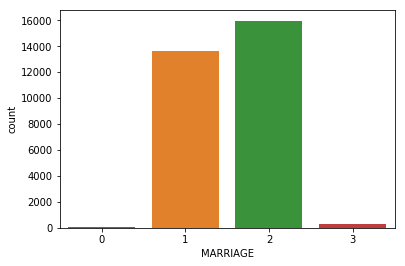

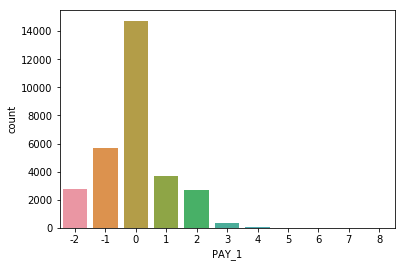

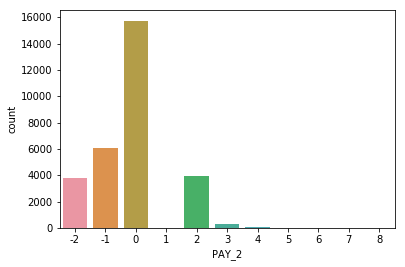

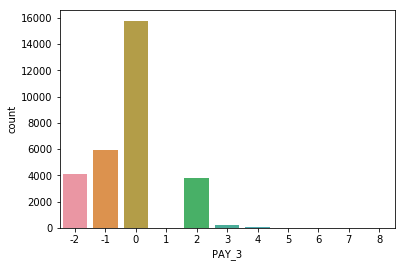

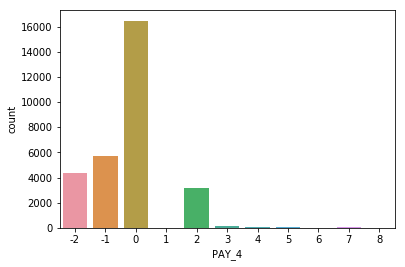

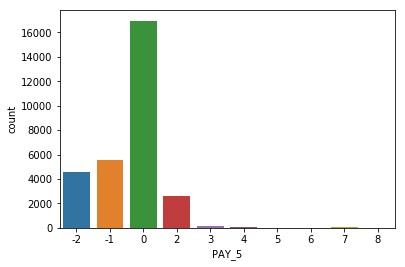

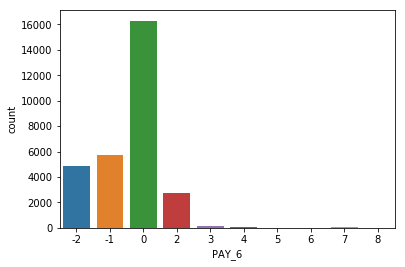

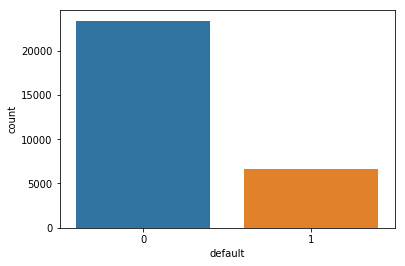

In [17]:
import seaborn as sns
for g in cat:
        sns.countplot(data[g])
        #plt.savefig(str(g)+'_barplot.png')
        
        plt.show()

In [18]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64